In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
orders_full = pd.read_csv("cleaned_data/orders_full.csv")
sales_vs_target = pd.read_csv("cleaned_data/sales_vs_target.csv")


In [3]:
orders_full.head()

,order_id,order_date,customername,state,city,order_value,total_items,order_profit,year,month,order_month
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,9599.0,19,-1218.0,2018,4,2018-04
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune,15559.0,22,975.0,2018,4,2018-04
2,B-25603,2018-04-03,Jahan,Madhya Pradesh,Bhopal,9086.0,25,-180.0,2018,4,2018-04
3,B-25604,2018-04-03,Divsha,Rajasthan,Jaipur,1543.0,11,22.0,2018,4,2018-04
4,B-25605,2018-04-05,Kasheen,West Bengal,Kolkata,525.0,7,0.0,2018,4,2018-04


In [4]:
orders_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      500 non-null    object 
 1   order_date    500 non-null    object 
 2   customername  500 non-null    object 
 3   state         500 non-null    object 
 4   city          500 non-null    object 
 5   order_value   500 non-null    float64
 6   total_items   500 non-null    int64  
 7   order_profit  500 non-null    float64
 8   year          500 non-null    int64  
 9   month         500 non-null    int64  
 10  order_month   500 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 43.1+ KB


In [5]:
orders_full.describe()


,order_value,total_items,order_profit,year,month
count,500.000000,500.00000,500.000000,500.00000,500.000000
mean,4293.740000,11.23000,47.910000,2018.34600,6.034000
std,7755.435756,10.11344,325.772327,0.47617,3.706794
min,6.000000,1.00000,-1836.000000,2018.00000,1.000000
25%,399.500000,3.00000,-22.250000,2018.00000,3.000000
50%,1628.500000,8.00000,22.000000,2018.00000,6.000000
75%,4887.000000,16.00000,128.500000,2019.00000,10.000000
max,100951.000000,57.00000,1970.000000,2019.00000,12.000000


In [6]:
# Overall business performance

total_revenue = orders_full["order_value"].sum()
total_profit = orders_full["order_profit"].sum()
total_orders = orders_full["order_id"].nunique()

print("Total Revenues: ", total_revenue) 
print("Total Profit: ",total_profit)
print("Total orders: ",total_orders)


Total Revenues:  2146870.0
Total Profit:  23955.0
Total orders:  500


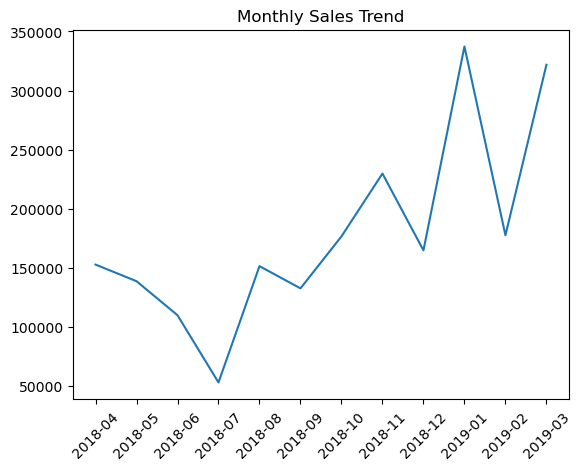

In [7]:
# Monthly sales trend

monthly_sales = (
    orders_full
    .groupby("order_month")["order_value"]
    .sum()
    .reset_index()
)

plt.figure()
plt.plot(monthly_sales["order_month"].astype(str),
         monthly_sales["order_value"])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.show()


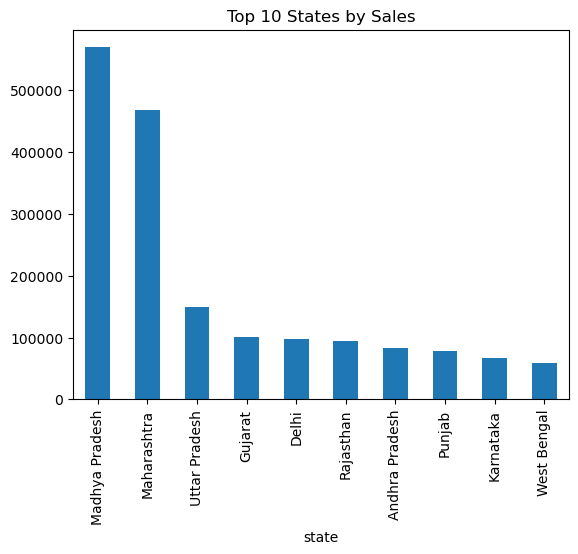

In [8]:
# State-wise performance

state_sales = (
    orders_full
    .groupby("state")["order_value"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

state_sales.plot(kind="bar", title="Top 10 States by Sales")
plt.show()


In [9]:
# Profitability analysis

orders_full["profit_margin"] = (
    orders_full["order_profit"] / orders_full["order_value"]
) * 100

orders_full["profit_margin"].describe()

count    500.000000
mean       1.203431
std       13.392390
min     -116.666667
25%       -3.209037
50%        3.074961
75%        6.726457
max       47.619048
Name: profit_margin, dtype: float64

In [10]:
# Target vs Actual performance (IMPORTANT)

sales_vs_target["achievement_pct"] = (
    sales_vs_target["actual_sales"] / sales_vs_target["target"] * 100
).round(2)

sales_vs_target.head()

,category,year,month,actual_sales,target_month,target,achievement_pct
0,Clothing,2018,4,13478.0,2018-04-01,12000,112.32
1,Clothing,2018,5,9518.0,2018-05-01,12000,79.32
2,Clothing,2018,6,8782.0,2018-06-01,12000,73.18
3,Clothing,2018,7,2981.0,2018-07-01,14000,21.29
4,Clothing,2018,8,11822.0,2018-08-01,14000,84.44


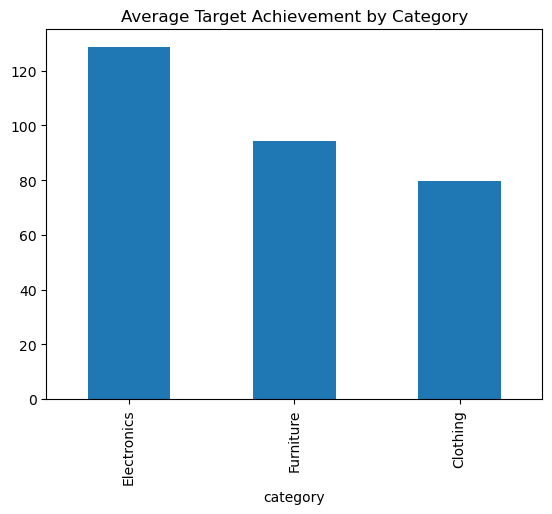

In [11]:
# Average achievement by category

category_performance = (
    sales_vs_target
    .groupby("category")["achievement_pct"]
    .mean()
    .sort_values(ascending=False)
)

category_performance.plot(kind="bar",title="Average Target Achievement by Category")
plt.show()


Key Insights:
1. Sales show seasonal patterns with peaks in specific months
2. Few states contribute majority of revenue
3. Profit margins vary significantly across orders
4. Some categories consistently miss targets